In [1]:
from google.colab import files

uploaded = files.upload()


Saving Data Model - Pizza Sales.et to Data Model - Pizza Sales.et
Saving Data Model - Pizza Sales.xlsx to Data Model - Pizza Sales.xlsx


In [2]:
import pandas as pd

df = pd.read_excel("Data Model - Pizza Sales.xlsx")

df.head()


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

df.dropna(subset=['order_date', 'order_time', 'pizza_name', 'total_price'], inplace=True)

df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.time

# Create time features
df['hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.hour
df['weekday'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month

# Fill missing ingredients
df['pizza_ingredients'] = df['pizza_ingredients'].fillna("Unknown")


In [4]:
if df.shape[0] > 0:
    df.to_csv("cleaned_pizza_sales.csv", index=False)
    from google.colab import files
    files.download("cleaned_pizza_sales.csv")
else:
    print("No data to save — check cleaning steps.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd

df = pd.read_csv("cleaned_pizza_sales.csv")

df.head()


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,hour,weekday,month
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,Thursday,1
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,Thursday,1
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,Thursday,1
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11,Thursday,1
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11,Thursday,1


In [6]:
print("Rows and Columns:", df.shape)


Rows and Columns: (48620, 15)


In [7]:
print(df.columns.tolist())


['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name', 'hour', 'weekday', 'month']


In [8]:
df.isnull().sum()


,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [9]:
# Top 5 pizzas
df['pizza_name'].value_counts().head(5)

,count
pizza_name,
The Classic Deluxe Pizza,2416
The Barbecue Chicken Pizza,2372
The Hawaiian Pizza,2370
The Pepperoni Pizza,2369
The Thai Chicken Pizza,2315


In [10]:
# Sales by day
df.groupby('weekday')['quantity'].sum()

,quantity
weekday,
Friday,8242
Monday,6485
Saturday,7493
Sunday,6035
Thursday,7478
Tuesday,6895
Wednesday,6946


In [11]:
# Total revenue by pizza size
df.groupby('pizza_size')['total_price'].sum()

,total_price
pizza_size,
L,375318.70
M,249382.25
S,178076.50
XL,14076.00
XXL,1006.60


<Axes: xlabel='order_date'>

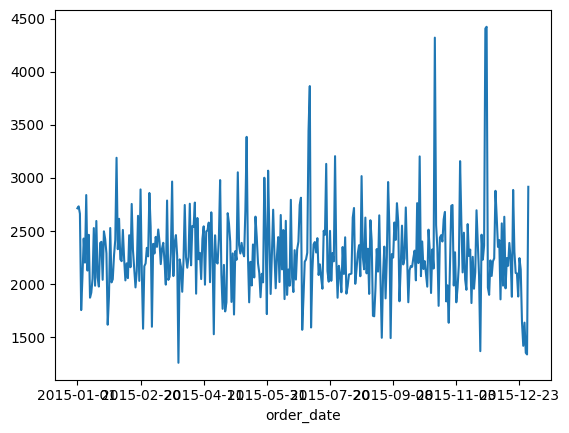

In [12]:
# Line plot of daily revenue
df.groupby('order_date')['total_price'].sum().plot()